In [106]:
import pandas as pd
import os
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Making sure we're in the correct directory
os.getcwd()

'/mnt/f/School/TI/picture_calculator'

In [3]:

filename_cnt = 0
all_filepaths = []
all_directories = []

for dirname, dirnames, filenames in os.walk('math_symbols_data'):
    

    for subdirname in dirnames:
        # print(os.path.join(dirname, subdirname))
        all_directories.append(os.path.join(dirname, subdirname))

    # print("\n\n---- ALL FILES ----\n")

    # print path to all filenames.
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        all_filepaths.append(os.path.join(dirname, filename))
        filename_cnt += 1

    # Advanced usage:
    # editing the 'dirnames' list will stop os.walk() from recursing into there.
    if '.git' in dirnames:
        # don't go into any .git directories.
        dirnames.remove('.git')

print(f"filename_cnt: {filename_cnt}")

filename_cnt: 65486


In [5]:
jpg_files = [filepath for filepath in all_filepaths if filepath[-4:]=='.jpg']
label_array = [filepath.split('/')[1] for filepath in jpg_files]
len(jpg_files)
label_array[-5:]

['z', 'z', 'z', 'z', 'z']

In [13]:
jpg_files[0]

'math_symbols_data/!/!_100071.jpg'

In [6]:
from collections import Counter

Counter(label_array)

Counter({'!': 224,
         '(': 3986,
         ')': 3978,
         '+': 5443,
         ',': 596,
         '-': 6022,
         '0': 1810,
         '1': 6327,
         '2': 6210,
         '3': 2469,
         '4': 1641,
         '5': 1008,
         '6': 812,
         '7': 753,
         '8': 731,
         '9': 742,
         '=': 3640,
         'A': 2724,
         'b': 1830,
         'C': 1194,
         'cos': 574,
         'div': 157,
         'forward_slash': 196,
         'log': 302,
         'pi': 498,
         'sin': 783,
         'sqrt': 1649,
         'tan': 281,
         'times': 600,
         'X': 5333,
         'y': 1895,
         'z': 1075})

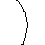

In [21]:
display(Image(filename=jpg_files[5555]))

In [31]:
img = Image.open(jpg_files[0]).convert('L')
img_array = img_to_array(img)
np.array(img_array).flatten()
print(img_array[:,:,0].shape)

(45, 45)


In [43]:

flattened_images = []
# non_flattened_images = []
time1 = datetime.now()

for number, filepath in enumerate(jpg_files):

    if number%500==0:
        print(f'At the {number}. iteration')

    img = Image.open(filepath).convert('L')
    img_array = img_to_array(img)
    img_array = np.array(img_array).flatten()

    flattened_images.append(img_array)

time2 = datetime.now()

print(f"Finished in {time2-time1}.")

At the 0. iteration
At the 500. iteration
At the 1000. iteration
At the 1500. iteration
At the 2000. iteration
At the 2500. iteration
At the 3000. iteration
At the 3500. iteration
At the 4000. iteration
At the 4500. iteration
At the 5000. iteration
At the 5500. iteration
At the 6000. iteration
At the 6500. iteration
At the 7000. iteration
At the 7500. iteration
At the 8000. iteration
At the 8500. iteration
At the 9000. iteration
At the 9500. iteration
At the 10000. iteration
At the 10500. iteration
At the 11000. iteration
At the 11500. iteration
At the 12000. iteration
At the 12500. iteration
At the 13000. iteration
At the 13500. iteration
At the 14000. iteration
At the 14500. iteration
At the 15000. iteration
At the 15500. iteration
At the 16000. iteration
At the 16500. iteration
At the 17000. iteration
At the 17500. iteration
At the 18000. iteration
At the 18500. iteration
At the 19000. iteration
At the 19500. iteration
At the 20000. iteration
At the 20500. iteration
At the 21000. it

In [44]:
images_df = pd.DataFrame(data=flattened_images)
images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [45]:
images_df['class'] = label_array

In [46]:
images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,class
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,!
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,!
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,!
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,!
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,!


In [48]:
images_df.to_csv('images_df.csv', sep=';')

# Preparing Data for CNN

In [50]:
y = label_array
images_df.drop(['class'], axis=1, inplace=True)

In [91]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input, Activation, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelBinarizer


In [97]:
encoder = LabelBinarizer()
encoded_label_array = encoder.fit_transform(label_array)

# sparse categorical crossentropy accepts only indexes for labels, not one+hots, therefore I have to get the index of each label
indexed_label_array = np.array([np.array(label).argmax() for label in encoded_label_array])

In [68]:
non_flattened_images = np.array([np.reshape(image,(45,45)) for image in flattened_images])

In [69]:
non_flattened_images.shape

(65483, 45, 45)

In [98]:
y = indexed_label_array

X_train, X_test, y_train, y_test = train_test_split(
    non_flattened_images, y, test_size = 0.2, random_state = 42
)


In [100]:
indexed_label_array

array([ 0,  0,  0, ..., 31, 31, 31])

# Training Neural Network & Evaluating Performance

In [56]:
from keras.models import Model
from keras.optimizers import Adam

In [145]:
# How to choose Convolution parameters:
# https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d

# # Model 1
# x = Input(shape = (45,45,1))

# # first conv block
# c1 = Conv2D(45, (3, 3), strides=(1, 1), padding="same")(x)
# # c1 = Conv2D(45, 3, strides=(1, 1), padding="same")(x)
# b1 = BatchNormalization()(c1)
# a1 = Activation('relu')(b1)

# # second conv block 
# c2 = Conv2D(45, (3, 3), strides=(1, 1), padding="valid")(a1)
# b2 = BatchNormalization()(c2)
# a2 = Activation('relu')(b2)
# p2 = MaxPooling2D(pool_size=2)(a2)
# d2 = Dropout(rate=0.25)(p2)

# f2 = Flatten()(d2) # tensor into vector
# h3 = Dense(100)(f2)
# b3 = BatchNormalization()(h3)
# a3 = Activation('relu')(b3)
# d3 = Dropout(rate=0.5)(a3)
# z = Dense(32)(d3)
# p = Activation('softmax')(z)

# # Model 2

# x = Input(shape = (45,45,1))

# # first conv block
# c1 = Conv2D(45, (6, 6), strides=(1, 1), padding="same")(x)
# # c1 = Conv2D(45, 3, strides=(1, 1), padding="same")(x)
# b1 = BatchNormalization()(c1)
# a1 = Activation('relu')(b1)

# # second conv block 
# c2 = Conv2D(45, (6, 6), strides=(1, 1), padding="valid")(a1)
# b2 = BatchNormalization()(c2)
# a2 = Activation('relu')(b2)
# p2 = MaxPooling2D(pool_size=2)(a2)
# d2 = Dropout(rate=0.25)(p2)

# f2 = Flatten()(d2) # tensor into vector
# h3 = Dense(100)(f2)
# b3 = BatchNormalization()(h3)
# a3 = Activation('relu')(b3)
# d3 = Dropout(rate=0.5)(a3)
# z = Dense(32)(d3)
# p = Activation('softmax')(z)


# Model 3
# Inspiration from 99.7% accurate MNIST classifier - https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist

x = Input(shape = (45,45,1))

c1 = Conv2D(16, kernel_size = 3, activation = 'relu')(x)
b1 = BatchNormalization()(c1)
c2 = Conv2D(16, kernel_size = 3, activation = 'relu')(b1)
b2 = BatchNormalization()(c2)
c3 = Conv2D(16, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu')(b2)
b3 = BatchNormalization()(c3)
d1 = Dropout(0.4)(b3)

c4 = Conv2D(32, kernel_size = 3, activation = 'relu')(d1)
b4 = BatchNormalization()(c4)
c5 = Conv2D(32, kernel_size = 3, activation = 'relu')(b4)
b5 = BatchNormalization()(c5)
c6 = Conv2D(32, kernel_size = 5, strides = 2, padding = 'same', activation = 'relu')(b5)
b6 = BatchNormalization()(c6)
d2 = Dropout(0.4)(b6)

c7 = Conv2D(64, kernel_size = 4, activation = 'relu')(d2)
b7 = BatchNormalization()(c7)
f1 = Flatten()(b7)
d3 = Dropout(0.4)(f1)
z = Dense(32)(d3)
p = Activation('softmax')(z)



In [146]:
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 45, 45, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 43, 43, 16)        160       
_________________________________________________________________
batch_normalization_22 (Batc (None, 43, 43, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 41, 41, 16)        2320      
_________________________________________________________________
batch_normalization_23 (Batc (None, 41, 41, 16)        64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 21, 16)        6416      
_________________________________________________________________
batch_normalization_24 (Batc (None, 21, 21, 16)        64  

In [148]:
# Fit the model; returns History object
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_split=0.15)

Epoch 1/15
696/696 [==============================] - 53s 76ms/step - loss: 0.5320 - accuracy: 0.8505 - val_loss: 0.4676 - val_accuracy: 0.8749
Epoch 2/15
696/696 [==============================] - 52s 75ms/step - loss: 0.3101 - accuracy: 0.9088 - val_loss: 0.2471 - val_accuracy: 0.9296
Epoch 3/15
696/696 [==============================] - 52s 75ms/step - loss: 0.2587 - accuracy: 0.9234 - val_loss: 0.4731 - val_accuracy: 0.8612
Epoch 4/15
696/696 [==============================] - 52s 74ms/step - loss: 0.2226 - accuracy: 0.9329 - val_loss: 0.1947 - val_accuracy: 0.9408
Epoch 5/15
696/696 [==============================] - 50s 72ms/step - loss: 0.2004 - accuracy: 0.9380 - val_loss: 0.1929 - val_accuracy: 0.9397
Epoch 6/15
696/696 [==============================] - 50s 73ms/step - loss: 0.1851 - accuracy: 0.9417 - val_loss: 0.1693 - val_accuracy: 0.9480
Epoch 7/15
696/696 [==============================] - 51s 73ms/step - loss: 0.1744 - accuracy: 0.9450 - val_loss: 0.2752 - val_accuracy:

Text(0.5, 1.0, 'Accuracy')

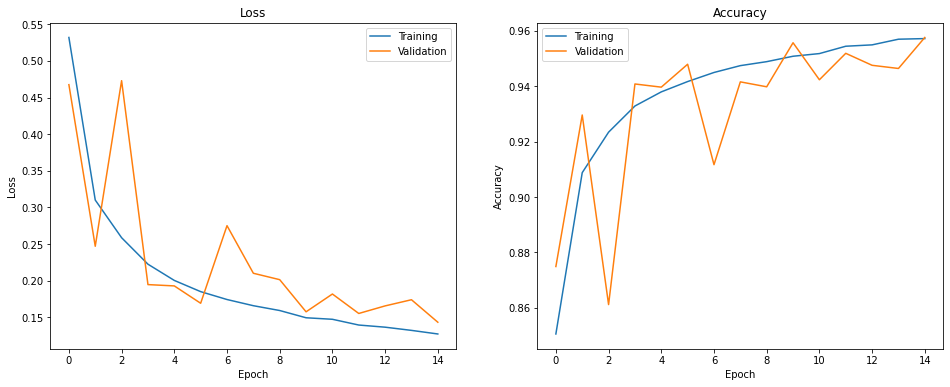

In [149]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

In [150]:
model.evaluate(X_test, y_test)

410/410 [==============================] - 3s 7ms/step - loss: 0.1466 - accuracy: 0.9572


[0.14658989012241364, 0.9572421312332153]

In [151]:
predictions = model.predict(X_test)
predictions = [np.array(prediction).argmax() for prediction in predictions]

In [152]:
accuracy = np.array(predictions==y_test).sum()/len(predictions)
print(accuracy)

0.9572421165152325


In [153]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predictions, y_test)

In [130]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues,
                        size = (15,15)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=size)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 42   0   0 ...   0   0   0]
 [  0 769   0 ...   0   0   0]
 [  0   0 740 ...   0   0   0]
 ...
 [  0   0   0 ...  21   0   0]
 [  0   0   0 ...   1 365   2]
 [  0   0   0 ...   0   1 159]]


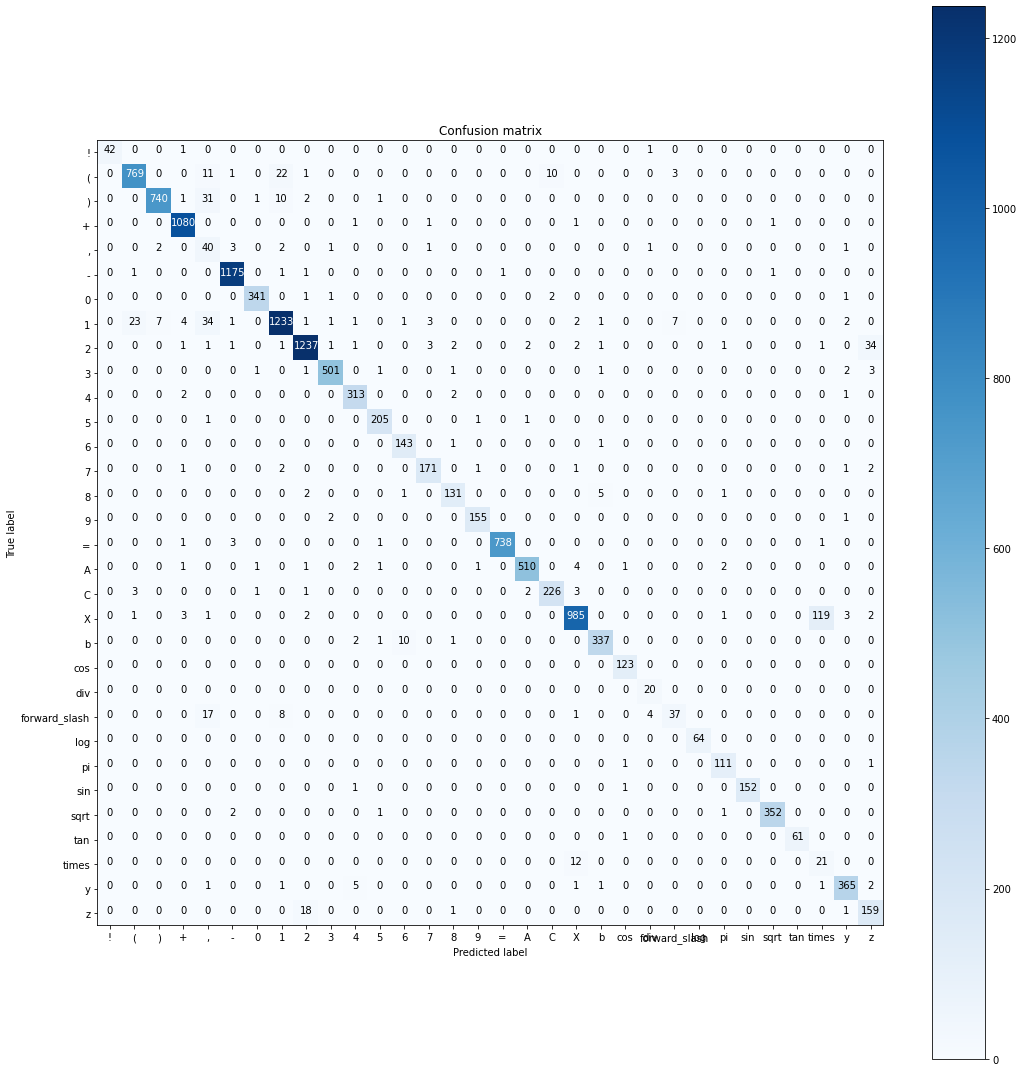

In [154]:
# https://deeplizard.com/learn/video/km7pxKy4UHU

import itertools

cm_plot_labels = np.unique(label_array)

plot_confusion_matrix(cm, classes = cm_plot_labels)

In [155]:
model.save('math_symbol_classifier_model_v3')

INFO:tensorflow:Assets written to: math_symbol_classifier_model_v3/assets
